# COGS 108 - EDA Checkpoint

# Names

- Giselle Carames
- Elif Yildiz
- Emily Chang
- Ravi Shende
- Aisha Wolff

# Research Question

How does healthcare quality in terms of preventable deaths, average hospital stay, access medical technology, and life expectancies correlate with healthcare expenditure per capita by each OECD (Organization for Economic Cooperation and Development) country from 2000-2019?

## Background and Prior Work


Healthcare spending is a heavily debated topic in politics, but can we learn from the outcomes of countries' different healthcare policies around the world? We aim to research the correlation between healthcare expenditure per capita and quality of received care among developed countries with public healthcare systems. Here, we define quality of care as a collection of the proportion of preventable deaths, surgery wait times, life expectancies, and healthcare satisfaction rates. The amount of financial resources allocated to healthcare in various individual countries have been found to impact the overall quality of the healthcare provided. How healthcare outcomes correlate with the amount of healthcare expenditure has gotten mixed results, although many results find a positive correlation, especially in OECD countries. OECD countries are a collective of countries with market-based economies that work together to create policies for sustainable growth. 

The previous works differ in the exact results because of different metrics used. However, even though there may be a mild positive correlation between healthcare expenditure and overall satisfaction in most, a lot of results also indicate that there is no clear positive or negative correlation between healthcare expenditure and quality of care received2 -- especially when the spending is not efficiently utilized,3. The study published by The Annals of Internal Medicine is a synthesis of several prior studies to determine if there is an association between healthcare cost and quality in the United States2. It observes studies over the years of 1990-2012, concluding that the association was relatively clinically insignificant. This is one of the reasons why we decided to focus solely on countries with public healthcare systems, as government spending has a larger direct impact on the healthcare system as a whole.

1. ^ Anwar, Asim, et al. (22 Mar. 2023) Government Health Expenditures and Health Outcome Nexus: A Study on OECD Countries. Frontiers, Frontiers. www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2023.1123759/full.
2. ^ Hussey, Peter S, et al. (1 Jan. 2013) The Association Between Health Care Quality and Cost: A Systematic Review ACP Journals. Annals of Internal Medicine. www.acpjournals.org/doi/10.7326/0003-4819-158-1-201301010-00006?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed.
3. ^ Fowler, Floyd J, et al. (28 May 2008) Relationship between Regional per Capita Medicare Expenditures and Patient Perceptions of Quality of Care. JAMA, JAMA Network. www.jamanetwork.com/journals/jama/fullarticle/181980.


# Hypothesis


Increased healthcare expenditure per capita is positively correlated with lower preventable deaths, shorter hospital stay lengths, greater medical technology access, and higher life expectancies at birth across countries.

**Explanation:**

In our background analysis, we found that several previously conducted studies indicated that greater healthcare expenditure correlates to increased healthcare quality. As such, we expect similarly positive results since our definition of healthcare quality includes variables similar to those analyzed across previous studies. We believe this is further increased by the fact that we have carefully narrowed our scope to OECD countries with public healthcare.

# Data

##  - Data overview

All information for each dataset can be found under their title.

Each dataset has at least 4 variables: 
  1. country
  2. code (aka country code - for use when merging later)
  3. year (spanning 2000-2019)
  4. a variable important to our analysis


## - Plan to Combine Datasets:

We will combine all of our datasets by country and year, specifically on the "code" column, which holds the three letter country code, rather than the "country" column which holds the name of the country. this way, we do not have to deal with any merge problems if countries are named slightly differently (e.g. 'United States' vs 'United States of America'). Every dataset is set up to have a year and country code column, where each country is represented from the years 2000-2019, so this won't be an issue. After this, we will drop down to only the OECD countries and fix any naming inconsistencies, then examine if there are any gaps in columns certain rows (which represent a country, year combination), and decide what to do in those cases, potentially dropping the row. We have not yet dropped NA values in data rows, as we will decide what to do about it once everything is merged into one dataset.

## - Cleaning and Importing Datasets

In [41]:
# Imports
import pandas as pd
from analysis import analyze
from tidy import tidy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Since several of our datasets were from the same OECD information website, the datasets often had the same general layout when downloaded. Therefore, we created a function `tidy` that takes in some input parameters specific to a given dataset and runs a common set of steps on that dataframe in order to tidy it. This way, we weren't copy pasting the code and modifying it a bunch.

 ### 1. Healthcare Expenditure per Capita by Country 


- Dataset Name: Current health expenditure per capita (current US$)
- Link to the dataset: https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD
- Number of observations: 5320 (271 before data wrangling)
- Number of variables: 4 (69 before data wrangling)

In [20]:
def healthcare_expenditure_worldbank():
    df = pd.read_csv("original_datasets/healthcare_expenditure_worldbank.csv")
    df = df.rename(columns=df.iloc[3]).iloc[4:]
    #drop columns not needed and only years from 2000 to 2019
    columns_to_keep = ['Country Name', 'Country Code'] + \
                  [col for col in df.columns if isinstance(col, float) and col >= 2000.0 and col<=2019]
    df_filtered = df[columns_to_keep]
    
    #change the orientation of the dataframe and add years as observations instead of variables
    df_long = pd.melt(df_filtered, 
                  id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', 
                  value_name='Value')
    
    # convert 'year' column from float to integer
    df_long['Year'] = df_long['Year'].astype(int)
    # change column names
    df_long.columns = ['country', 'code', 'year', 'expenditure_per_capita']
    # sort df
    df_long = df_long.sort_values(['code', 'year'], ascending=[True, True])
    df_long = df_long.reset_index(drop=True)
    # save df
    df_long.to_csv("cleaned_datasets/healthcare_expenditure_worldbank.csv", index=False)

# tidy the data - commented out since it only needed to run once to tidy the data
# healthcare_expenditure_worldbank()
# load the data
health_exp = pd.read_csv("cleaned_datasets/healthcare_expenditure_worldbank.csv")
health_exp

,country,code,year,expenditure_per_capita
0,Aruba,ABW,2000,NaN
1,Aruba,ABW,2001,NaN
2,Aruba,ABW,2002,NaN
3,Aruba,ABW,2003,NaN
4,Aruba,ABW,2004,NaN
...,...,...,...,...
5315,Zimbabwe,ZWE,2015,105.098030
5316,Zimbabwe,ZWE,2016,106.189697
5317,Zimbabwe,ZWE,2017,92.254288
5318,Zimbabwe,ZWE,2018,114.632950


The above dataset from the World Bank database that includes Healthcare expenditure per capita by country from 1960 to now including 271 countries. The dataset originally had years as its columns and had unnecessary columns such as "Indicator Name" which only had one value (healthcare expenditure per capita). We only limited the dataset to include only data from 2000 to 2019 like we did in all the other datasets and specifically for the World Bank data we needed to use the "melt" function from pandas so the years would appear as observations instead of variables.

### 2. Life Expectancy by Country 


- Dataset Name: Life expectancy at birth, total (years) - World
- Link to the dataset: https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=1W
- Number of observations: 5320 (271 before data wrangling)
- Number of variables: 4 (69 before data wrangling)

In [21]:
def life_expectancy_worldbank():
    df = pd.read_csv("original_datasets/life_expectancy.csv")
    df = df.rename(columns=df.iloc[3]).iloc[4:]
    #drop columns not needed and only years from 2000 to 2019
    columns_to_keep = ['Country Name', 'Country Code'] + \
                   [col for col in df.columns if isinstance(col, float) and col >= 2000.0 and col<=2019]
    df_filtered = df[columns_to_keep]
    
    #change the orientation of the dataframe and add years as observations instead of variables
    df_long = pd.melt(df_filtered,
                  id_vars=['Country Name', 'Country Code'],
                  var_name='Year',
                  value_name='Value')
    
    # convert 'year' column from float to integer
    df_long['Year'] = df_long['Year'].astype(int)
    # change column names
    df_long.columns = ['country', 'code', 'year', 'life_expectancy']
    # sort dataframe
    df_long = df_long.sort_values(['code', 'year'], ascending=[True, True])
    df_long = df_long.reset_index(drop=True)
    df = df_long
    df.to_csv('cleaned_datasets/life_expectancy.csv', index=False)
    df_title = 'life_expectancy'
    analyze(df, df_title)
    print("Dataframe:", df, sep="\n")

# tidy the data - commented out since it only needed to run once to tidy the data
# life_expectancy_worldbank()
#load the data
life_expec = pd.read_csv("cleaned_datasets/life_expectancy.csv")
life_expec

,country,code,year,life_expectancy
0,Aruba,ABW,2000,73.569
1,Aruba,ABW,2001,73.647
2,Aruba,ABW,2002,73.726
3,Aruba,ABW,2003,73.752
4,Aruba,ABW,2004,73.576
...,...,...,...,...
5315,Zimbabwe,ZWE,2015,59.591
5316,Zimbabwe,ZWE,2016,60.306
5317,Zimbabwe,ZWE,2017,60.709
5318,Zimbabwe,ZWE,2018,61.414


The above dataset from the World Bank database as well and it includes Life Expectancy at birth (in years) by country from 1960 to now including 271 countries like our first data. We used mostly the same process as we did in the first dataset to clean this data (using melt function, dropping unnecessary columns, etc.) because the two datasets are very similar. The only difference between the two was that the value for #2 was life expectancy instead of healthcare expenditure per capita.

### 3. Avoidable Mortality Rates by Country


- Dataset Name: Avoidable Mortality
- Link to the dataset: https://data-explorer.oecd.org/vis?fs[0]=T%2Co&pg=20&fc=Topic&snb=80&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_STAT%2540DF_AM&df[ag]=OECD.ELS.HD&df[vs]=1.0&dq=.A...._T.......&pd=2%2C0%2C1%2C0%2C%25%2C2%2CC&to[TIME_PERIOD]=false 
- Number of observations: 13770
- Number of variables: 4

In [22]:
def avoidable_mortality():
    read_file = "original_datasets/avoidable_mortality.csv"
    df = pd.read_csv(read_file)
    df_title = "avoidable_mortality"
    unnecessary_cols = ["STRUCTURE", "STRUCTURE_ID", "STRUCTURE_NAME", "ACTION", "FREQ", "MEASURE",
                        "UNIT_MEASURE", "Time period", "Observation value", "UNIT_MULT",
                        "DECIMALS", "Decimals", "AGE", "SOCIO_ECON_STATUS", "DEATH_CAUSE",
                        "CALC_METHODOLOGY", "GESTATION_THRESHOLD", "HEALTH_STATUS", "DISEASE",
                        "CANCER_SITE", "Observation value", "OBS_STATUS2", "SEX",
                        "OBS_STATUS3"]
    new_data_cols_rename_dict = {
        "OBS_VALUE": "avoidable_deaths"
    }
    df = tidy(df, df_title=df_title, new_data_cols_map=new_data_cols_rename_dict,
              drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print(df)


# tidy the data - commented out since it only needed to run once to tidy the data
# avoidable_mortality()
# load the data
av_mortality = pd.read_csv("cleaned_datasets/avoidable_mortality.csv")
av_mortality

,code,country,year,avoidable_deaths
0,ARG,Argentina,2000,135.9
1,ARG,Argentina,2000,473.9
2,ARG,Argentina,2000,45802.0
3,ARG,Argentina,2000,97487.0
4,ARG,Argentina,2000,91.3
...,...,...,...,...
15187,ZAF,South Africa,2018,50267.5
15188,ZAF,South Africa,2018,582.9
15189,ZAF,South Africa,2018,221.6
15190,ZAF,South Africa,2018,238073.0


The above dataset displays data from OECD Data Explorer and shows avoidable mortality by country stored as floats. The dataset has avoidable mortality as defined by deaths that could have been avoided given proper measures and healthcare access. This dataset needed cleaning to only include the dates we are analyzing (2000-2019).

### 4. Average Hospital Stay by Country 

- Dataset Name: Hospital average length of stay by diagnostic categories
- Link to the dataset: https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_PROC%2540DF_HOSP_AV_LENGTH&df[ag]=OECD.ELS.HD&dq=.....DICDA100............&pd=%25%2C2%2CC&to[TIME_PERIOD]=false&vw=ov 
- Number of observations: 84558
- Number of variables: 4

In [23]:
def hospital_stay_length():
    df = pd.read_csv("original_datasets/hospital_stay_length.csv")
    df_title = "hospital_stay_length"
    unnecessary_cols = ["STRUCTURE", "STRUCTURE_ID", "STRUCTURE_NAME", "ACTION", "MEASURE",
                        "UNIT_MEASURE", "Time period", "Observation value", "UNIT_MULT",
                        "DECIMALS", "Decimals", "AGE", "DISEASE", "DIAGNOSTIC_TYPE", "PROVIDER",
                        "CANCER_SITE", "Observation value", "OBS_STATUS2", "SEX", "FUNCTION", 
                        "MODE_PROVISION", "CARE_TYPE", "HEALTH_FACILITY", "WAITING_TIME",
                        "CONSULTATION_TYPE", "OBS_STATUS", "OBS_STATUS2", "OBS_STATUS3", 
                        "MEDICAL_PROCEDURE", "OCCUPATION"]
    new_data_cols_rename_dict = {
        "OBS_VALUE": "hospital_stay_length"
    }
    df = tidy(df, df_title=df_title, new_data_cols_map=new_data_cols_rename_dict,
              drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print(df)

# tidy the data - commented out since it only needed to run once to tidy the data
# hospital_stay_length()
# load the data
len_stay = pd.read_csv("cleaned_datasets/hospital_stay_length.csv")
len_stay

,code,country,year,hospital_stay_length
0,AUS,Australia,2000,5.2
1,AUS,Australia,2000,7.9
2,AUS,Australia,2000,4.2
3,AUS,Australia,2000,4.6
4,AUS,Australia,2000,6.1
...,...,...,...,...
93189,USA,United States,2010,4.3
93190,USA,United States,2010,4.7
93191,USA,United States,2010,4.9
93192,USA,United States,2010,4.3


The above dataset shows data from OECD Data Explorer and shows the average length of stay by diagnostic categories. The average length of stay is calculated in this dataset by dividing the number of "bed-days" by number of discharges in the given year. This dataset needed to be cleaned to include our dates of interest (2000-2019) and drop excess columns to see the length of stay.

### 5. Health Expenditure and Financing


- Dataset Name: Health expenditure and financing
- Link to the dataset: https://data-explorer.oecd.org/vis?df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_SHA%40DF_SHA&df[ag]=OECD.ELS.HD&df[vs]=1.0&dq=.A.EXP_HEALTH.PT_B1GQ._T.._T.._T..._Z&pd=2000%2C2009&to[TIME_PERIOD]=false&vw=tb
- Number of observations: 984
- Number of variables: 4


In [24]:
def health_expenditure_as_percent_of_gdp():
    read_file = "original_datasets/filtered_health_expenditure_as_percent_gdp.csv"
    # cols 38 - 41 are NA for the first large chunk --> pandas must be told their type to not mix up types while reading in df in chunks to save memory
    df = pd.read_csv(read_file, dtype={i: object for i in range(38,42)})
    # most of these are duplicate short-version columns
    unnecessary_cols = [
        'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'MEASURE', 'UNIT_MEASURE', 'FREQ',
        'FINANCING_SCHEME', 'PRICE_BASE', 'CURRENCY', 'BASE_PER', 'FUNCTION', 'MODE_PROVISION',
        'FACTOR_PROVISION', 'ASSET_TYPE', 'Time period', 'Observation value', 'DECIMALS',
        'Decimals', 'OBS_STATUS', 'OBS_STATUS2', 'OBS_STATUS3', 'Unit multiplier', 'UNIT_MULT',
        'MODE_PROVISION'
    ]
    data_cols_rename_dict = {
        'OBS_VALUE': 'health_expenditure_as_percent_gdp'
    }
    df_title = "filtered_health_expenditure_as_percent_gdp"
    country_col = "Reference area"
    
    # tidy and analyze dataframe
    df = tidy(df, df_title, data_cols_rename_dict, og_country_column=country_col,
              og_year_column="TIME_PERIOD", drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print("Dataframe:", df, sep="\n")

# tidy the data - commented out since it only needed to run once to tidy the data
# health_expenditure_as_percent_of_gdp()
# load the data
expenditure_p_gdp = pd.read_csv("cleaned_datasets/filtered_health_expenditure_as_percent_gdp.csv")
expenditure_p_gdp

,code,country,year,health_expenditure_as_percent_gdp
0,ARG,Argentina,2000,8.220
1,ARG,Argentina,2001,8.372
2,ARG,Argentina,2002,7.393
3,ARG,Argentina,2003,6.895
4,ARG,Argentina,2004,7.229
...,...,...,...,...
979,ZAF,South Africa,2015,8.053
980,ZAF,South Africa,2016,8.080
981,ZAF,South Africa,2017,7.977
982,ZAF,South Africa,2018,8.077


The above is a dataset from OECD Data Explorer that contains the metric of the ratio of the gdp that each country spends on its healthcare. This is a float between between 0 and 100 (although no country has near 100). We limited the data from 2000-2019, and used the same tidy() function we wrote that was used in datasests 3 and onward (for all the OECD Data Explorer datasets). This function drops unnecessary columns, renames them to lowercase with no spaces, sorts the dataframe by country then year, and saves in two steps: one as an informational dataframe (with text-based columns), and one with only country, country code, year, and numerical columns. 

### 6. Medical Technological Availability


  - Dataset Name: Medical technology availability
  - Link to the dataset: https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_REAC_HOSP%40DF_MED_TECH&df[ag]=OECD.ELS.HD&dq=..10P6HB......_T&pd=%2C&to[TIME_PERIOD]=false&vw=tb
  - Number of observations: 16492
  - Number of variables: 4

In [25]:
def medical_tech_availability():
    read_file = "original_datasets/medical_tech_availability.csv"
    df = pd.read_csv(read_file)
    # most of these are duplicate short-version columns
    unnecessary_cols = [
        'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'MEASURE', 'UNIT_MEASURE',
        'STATISTICAL_OPERATION', 'OWNERSHIP_TYPE', 'HEALTH_FUNCTION', 'CARE_TYPE',
        'HEALTH_CARE_PROVIDER', 'Time period', 'Observation value', 'DECIMALS', 'Decimals',
        'OBS_STATUS', 'OBS_STATUS2', 'OBS_STATUS3', 'UNIT_MULT', 'REF_YEAR_PRICE'
    ]
    data_cols_rename_dict = {
        'OBS_VALUE': 'med_tech_availability_p_mil_ppl'
    }
    df_title = "medical_tech_availability"
    df = tidy(df, df_title,
              data_cols_rename_dict, drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print("Dataframe:", df, sep="\n")

# tidy the data - commented out since it only needed to run once to tidy the data
# medical_tech_availability()
# load the data
med_tech = pd.read_csv("cleaned_datasets/medical_tech_availability.csv")
med_tech

,code,country,year,med_tech_availability_p_mil_ppl
0,AUS,Australia,2000,99.00
1,AUS,Australia,2000,67.00
2,AUS,Australia,2000,500.00
3,AUS,Australia,2000,5.20
4,AUS,Australia,2000,26.28
...,...,...,...,...
16487,USA,United States,2019,16.54
16488,USA,United States,2019,63.81
16489,USA,United States,2019,48.76
16490,USA,United States,2019,22.36


The above is a dataset from OECD Data Explorer that contains the availability of different medical technologies in each country per 1,000,000 inhabitants. These technologies are the following (from OECD Data Explorer): "computed tomography scanners, magnetic resonance imaging units, positron emission tomography (PET) scanners, gamma cameras, mammographs, and radiation therapy equipment". The datatype of this value column is a float, and it is greater than or equal to 0. These values are a proxy for how well equipped a medical system is in relation to its population size.

## Merged Data

### Code 

In [26]:
"""
# load all the necessary datasets

health_exp = pd.read_csv("cleaned_datasets/healthcare_expenditure_worldbank.csv")
med_tech = pd.read_csv("cleaned_datasets/medical_tech_availability.csv")
expenditure_p_gdp = pd.read_csv("cleaned_datasets/filtered_health_expenditure_as_percent_gdp.csv")
len_stay = pd.read_csv("cleaned_datasets/hospital_stay_length.csv")
av_mortality = pd.read_csv("cleaned_datasets/avoidable_mortality.csv")
life_expec = pd.read_csv("cleaned_datasets/life_expectancy.csv")

# inner mege all the necessary datasets by (country, year)

inner_merged = health_exp.merge(life_expec, on=['code', 'year'], how='inner') \
                  .merge(av_mortality, on=['code', 'year'], how='inner') \
                  .merge(len_stay, on=['code', 'year'], how='inner') \
                  .merge(expenditure_p_gdp, on=['code', 'year'], how='inner') \
                 .merge(med_tech, on=['code', 'year'], how='inner')
inner_merged     


#aggreagte hospital length stay and med tech availability by mean for each (country, year)

aggregated = inner_merged.groupby(['code', 'year'], as_index=True).agg({
    'hospital_stay_length': 'mean',  
    'med_tech_availability_p_mil_ppl': 'mean',
    'expenditure_per_capita': 'first' ,       
    'life_expectancy': 'first' ,
    'avoidable_deaths': 'first' ,
    'health_expenditure_as_percent_gdp': 'first' 
})

#store the merged dataset in inner_final
inner_final = aggregated.reset_index()

#uncomment to turn it into a csv file
#inner_final.to_csv('cleaned_datasets/inner_merged.csv')
"""

'\n# load all the necessary datasets\n\nhealth_exp = pd.read_csv("cleaned_datasets/healthcare_expenditure_worldbank.csv")\nmed_tech = pd.read_csv("cleaned_datasets/medical_tech_availability.csv")\nexpenditure_p_gdp = pd.read_csv("cleaned_datasets/filtered_health_expenditure_as_percent_gdp.csv")\nlen_stay = pd.read_csv("cleaned_datasets/hospital_stay_length.csv")\nav_mortality = pd.read_csv("cleaned_datasets/avoidable_mortality.csv")\nlife_expec = pd.read_csv("cleaned_datasets/life_expectancy.csv")\n\n# inner mege all the necessary datasets by (country, year)\n\ninner_merged = health_exp.merge(life_expec, on=[\'code\', \'year\'], how=\'inner\')                   .merge(av_mortality, on=[\'code\', \'year\'], how=\'inner\')                   .merge(len_stay, on=[\'code\', \'year\'], how=\'inner\')                   .merge(expenditure_p_gdp, on=[\'code\', \'year\'], how=\'inner\')                  .merge(med_tech, on=[\'code\', \'year\'], how=\'inner\')\ninner_merged     \n\n\n#aggreagte h

In [27]:
inner_final = pd.read_csv('cleaned_datasets/inner_merged.csv')
inner_final

,code,year,hospital_stay_length,med_tech_availability_p_mil_ppl,expenditure_per_capita,life_expectancy,avoidable_deaths,health_expenditure_as_percent_gdp
0,AUS,2000,7.494595,116.833333,1636.528564,79.234146,86.4,7.589
1,AUS,2001,6.535135,128.330000,1559.821289,79.634146,82.2,7.674
2,AUS,2002,6.466216,148.933333,1763.695679,79.936585,80.2,7.872
3,AUS,2003,6.220946,229.317500,2240.746094,80.239024,75.0,7.877
4,AUS,2004,6.329730,258.602500,2760.830811,80.490244,73.1,8.083
...,...,...,...,...,...,...,...,...
536,USA,2006,4.759028,3563.260000,6779.227539,77.687805,228.2,14.709
537,USA,2007,4.828873,3571.532143,7132.446777,77.987805,222.4,14.918
538,USA,2008,4.915942,2940.638571,7347.454590,78.039024,92.5,15.207
539,USA,2009,4.863043,6427.385000,7602.745605,78.390244,89.9,16.201


# Results

## Exploratory Data Analysis:

### 1. Descriptive Analysis 

Let's see what the descriptive statistics look like for our dataset:

In [28]:
inner_final.describe()

,year,hospital_stay_length,med_tech_availability_p_mil_ppl,expenditure_per_capita,life_expectancy,avoidable_deaths,health_expenditure_as_percent_gdp
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,2010.395564,8.132922,194.967180,3039.587826,79.291699,13612.177449,8.355399
std,5.505107,2.401499,667.195630,2067.310835,2.669251,29972.888309,1.987646
min,2000.000000,4.100000,1.595000,204.000000,72.568293,41.800000,4.052000
25%,2006.000000,6.813514,20.750000,1139.000000,77.687805,146.000000,6.823000
50%,2011.000000,7.748322,46.330000,2678.000000,79.719512,399.400000,8.318000
75%,2015.000000,8.822148,152.755556,4696.000000,81.404878,11267.000000,9.805000
max,2019.000000,19.439597,6835.050000,9341.062500,83.904878,150471.500000,16.201000


#### 2. Missingness Analysis

Now, let's see if there are any null values in this dataset:

In [29]:
inner_final.isna().sum()

code                                 0
year                                 0
hospital_stay_length                 0
med_tech_availability_p_mil_ppl      0
expenditure_per_capita               0
life_expectancy                      0
avoidable_deaths                     0
health_expenditure_as_percent_gdp    0
dtype: int64

No null values does not mean there is not any missing data. For example, some countries might not have enough data of years for meaninguful analysis. Let's see what countries have more than 9 years of data missing and which years:

In [30]:

# Create a full range of years
all_years = range(2000, 2020)

# Check missing years per country
missing_years = {}
for code, group in inner_final.groupby('code'):
    present_years = set(group['year'])
    missing = set(all_years) - present_years
    missing_years[code] = sorted(missing)

# Output missing years
for code, years in missing_years.items():
    if len(years) > 9:
        print(f"Country {code} is missing years: {years}")


Country BGR is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Country CHL is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2015, 2016, 2018, 2019]
Country GRC is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2018, 2019]
Country HRV is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Country LTU is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Country LVA is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
Country NOR is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019]
Country ROU is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 20

Looks like there are 10 countries that miss more than 9 years of data, which would leave us with less than 10 years to analyze these countries. This is not ideal. Let's drop them from our dataset.

In [31]:
def drop_bad_countries_from_merged(merged_df, min_years_threshold = 10):
    """ Drop countries from a dataframe that have less than min_years_threshold years of data.
    """
    bad_codes = []
    for code, group in merged_df.groupby('code'):
        if len(group) < min_years_threshold:
            bad_codes.append(code)
    print("bad countries are:", bad_codes)
    merged_df = merged_df[~merged_df['code'].isin(bad_codes)]
    merged_df = merged_df.reset_index(drop=True)
    return merged_df

main_df = drop_bad_countries_from_merged(inner_final)
main_df.to_csv('cleaned_datasets/main_df.csv', index=False)
main_df



bad countries are: ['BGR', 'CHL', 'GRC', 'HRV', 'LTU', 'LVA', 'NOR', 'ROU', 'SWE']


,code,year,hospital_stay_length,med_tech_availability_p_mil_ppl,expenditure_per_capita,life_expectancy,avoidable_deaths,health_expenditure_as_percent_gdp
0,AUS,2000,7.494595,116.833333,1636.528564,79.234146,86.4,7.589
1,AUS,2001,6.535135,128.330000,1559.821289,79.634146,82.2,7.674
2,AUS,2002,6.466216,148.933333,1763.695679,79.936585,80.2,7.872
3,AUS,2003,6.220946,229.317500,2240.746094,80.239024,75.0,7.877
4,AUS,2004,6.329730,258.602500,2760.830811,80.490244,73.1,8.083
...,...,...,...,...,...,...,...,...
499,USA,2006,4.759028,3563.260000,6779.227539,77.687805,228.2,14.709
500,USA,2007,4.828873,3571.532143,7132.446777,77.987805,222.4,14.918
501,USA,2008,4.915942,2940.638571,7347.454590,78.039024,92.5,15.207
502,USA,2009,4.863043,6427.385000,7602.745605,78.390244,89.9,16.201


### Section 1 of EDA - Trends in Healthcare Expenditure per Capita over Time

This displays overall healthcare expenditure per capita in all the countries we are analyzing at over time. 

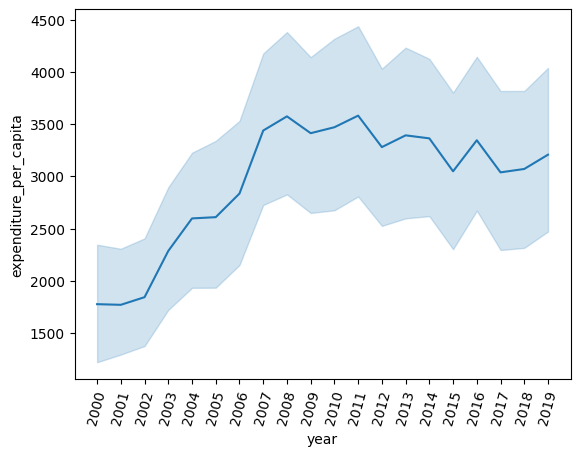

In [32]:

sns.lineplot(data = inner_final, x = 'year', y = 'expenditure_per_capita');
plt.xticks(np.arange(min(inner_final['year']), max(inner_final['year'])+1, 1))
plt.xticks(rotation=75)
plt.show()


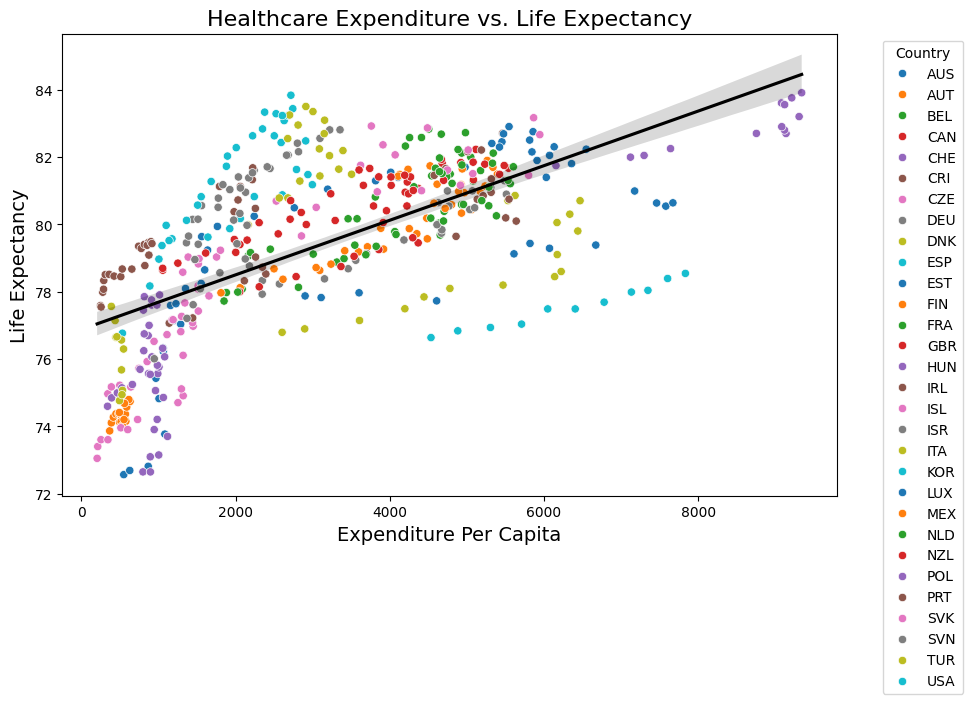

In [ ]:
# correlation between life expectancy and health expenditure by capita
def per_capita_life_exp():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='expenditure_per_capita', y='life_expectancy', hue='code', palette='tab10')
    sns.regplot(data=df, x='expenditure_per_capita', y='life_expectancy', scatter=False, color='black')
    plt.title('Healthcare Expenditure vs. Life Expectancy', fontsize=16)
    plt.xlabel('Expenditure Per Capita', fontsize=14)
    plt.ylabel('Life Expectancy', fontsize=14)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
per_capita_life_exp()

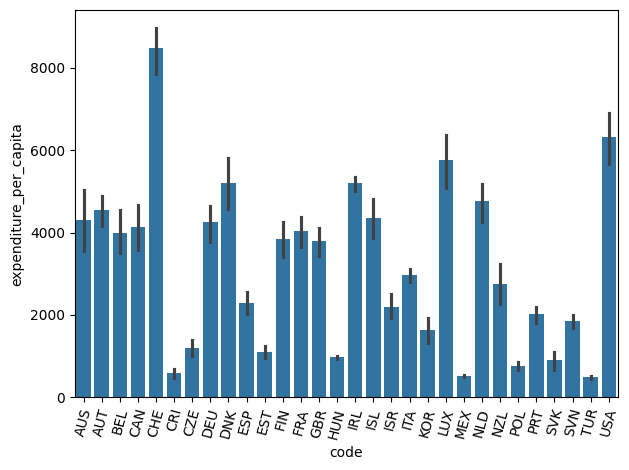

In [ ]:
# expenditure per capita by country (mean over the years)
def expenditure_per_capita_by_country():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    sns.barplot(data = df, x = 'code', y = 'expenditure_per_capita');
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

expenditure_per_capita_by_country()

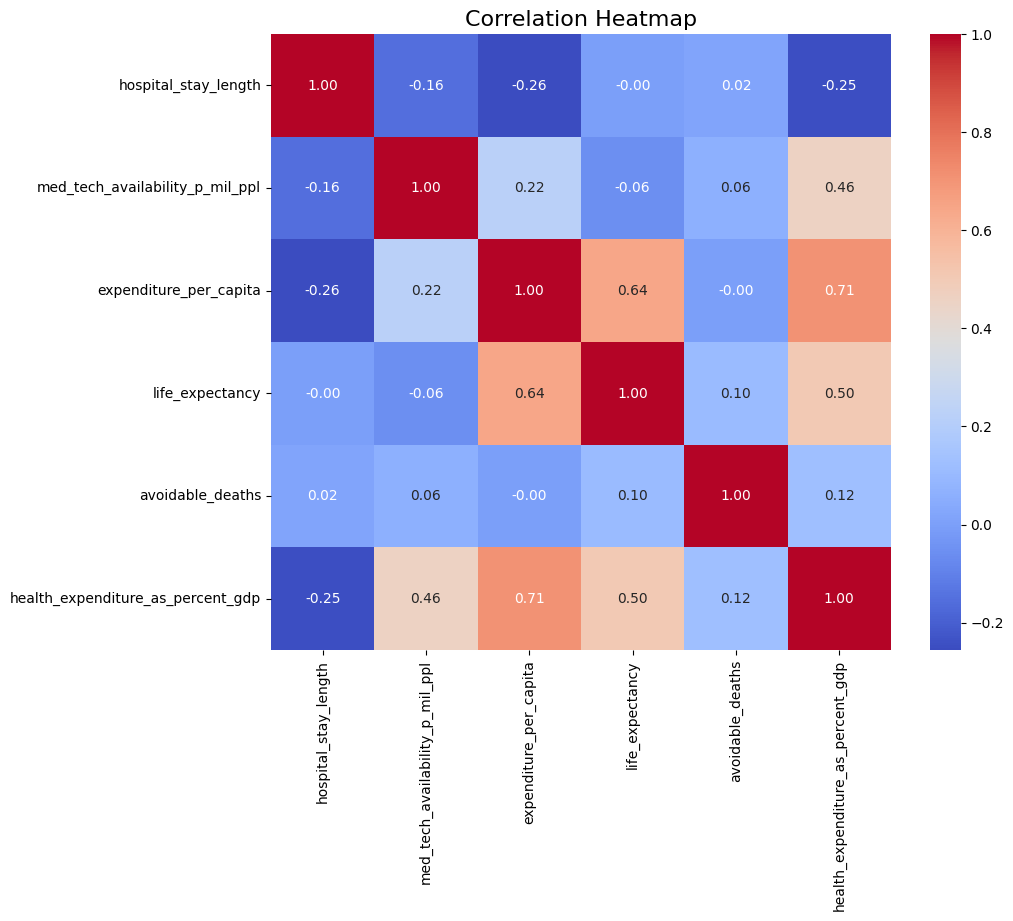

In [39]:
# correlation heat map for all variables
def heat_map_all_var():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[['hospital_stay_length', 'med_tech_availability_p_mil_ppl',
                                    'expenditure_per_capita', 'life_expectancy',
                                    'avoidable_deaths', 'health_expenditure_as_percent_gdp']].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()
    
heat_map_all_var()

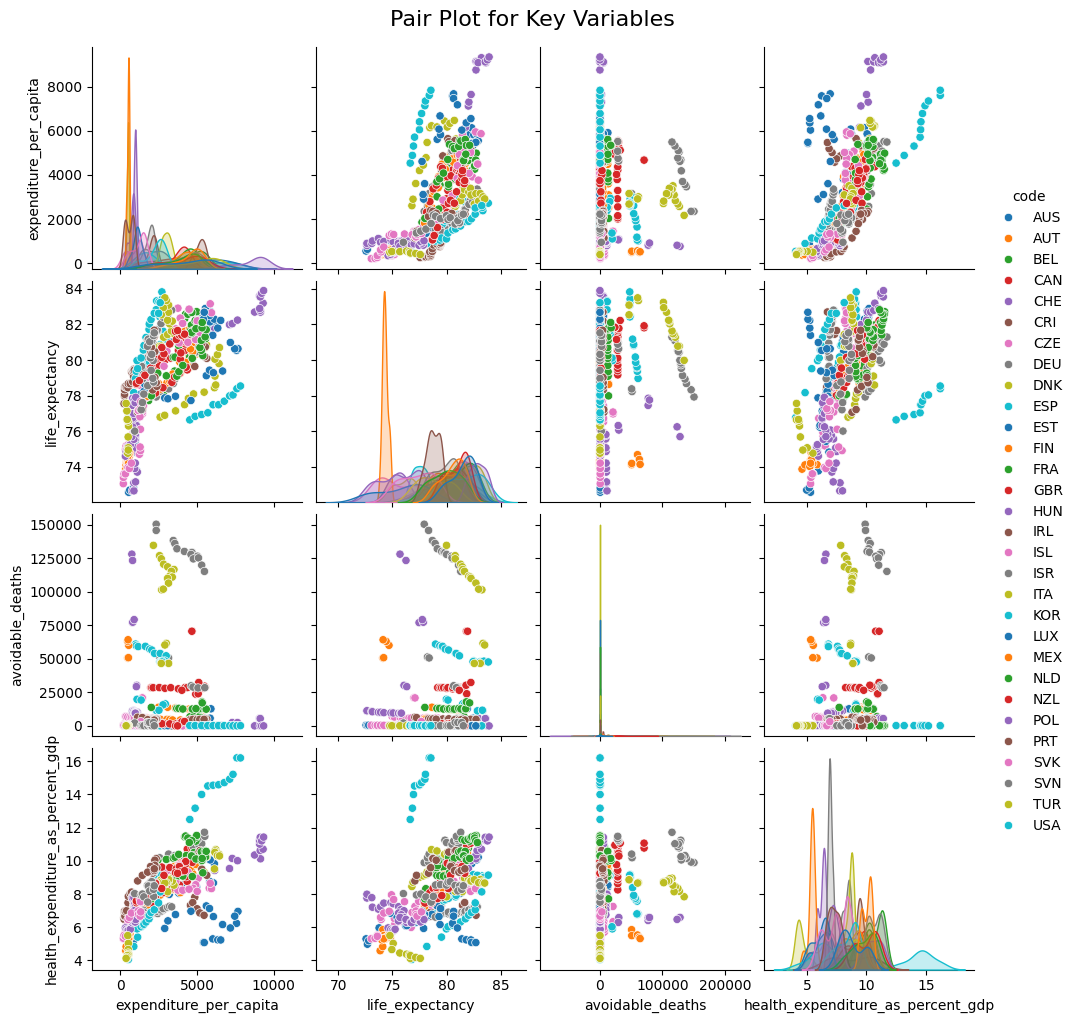

In [ ]:
# key variables correlation plots
def key_variables_plot():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    sns.pairplot(df, vars=['expenditure_per_capita', 'life_expectancy', 
                                    'avoidable_deaths', 'health_expenditure_as_percent_gdp'],
                hue='code', palette='tab10', diag_kind='kde', height=2.5)
    plt.suptitle('Pair Plot for Key Variables', y=1.02, fontsize=16)
    plt.show()
    
key_variables_plot()

# Ethics & Privacy

* In terms of data collection, we do not have to deal with informed consent or anything related to the creation of a study, because we are using previously-compiled datasets.
* As for data storage, we don’t need to secure the data that we have gathered here, because they are all from readily available online datasets. There will be no “individuals” in our dataset because we are collecting data by country rather than by individual patients, so no anonymizing or ‘right to be forgotten’ needs to be addressed.
* There are additional potential confounding variables to our analysis such as education of the healthcare providers, lifestyles by country, and access to resources not directly relating to healthcare itself, as such, this study is purely intended to explore correlation between the established variables, not establish causality.
* The data may not adequately represent marginalized populations or those without access to healthcare, leading to skewed results Some countries may report healthcare outcomes differently, leading to potential bias - countries with less rigorous data collection systems may underreport certain issues.
* We will avoid looking at data within LCD countries, specifically focusing on OECD countries. This is because high-income countries often provide more detailed healthcare data than low-income or developing countries. This lack of data from lower-income nations could skew analyses toward healthcare systems that are well-funded, leading to overgeneralized findings that don’t apply to all income levels. Also, for LDC countries, there might be other strong reasons for why healthcare might be low quality other than healthcare spending (e.g. war).
* Country-level data might also cover some disparities among different minority groups in each country. For example, in the US, healthcare quality significantly varies across different states and cities, so the overall data of the country might misrepresent the level of healthcare quality received by its citizens. For this problem, if OECD provides regional data for bigger countries, we should incorporate these regional variations.
* Over-simplifications of the effects of spending and healthcare, if interpreted for policy-making could lead to a focus on only financially efficient initiatives and not initiatives that are currently critical in their country. This is not intended to inform political or financial decisions.

# Team Expectations 


* Communication will take place over slack or text with a preferable same-day response time. Meeting at least once a week in-person on Thursdays at 5 pm, and additional meetings in the same week can be over zoom (this excludes Thanksgiving week).
* Everyone is expected to contribute their share of work, as discussed in meetings. If someone is failing to meet these expectations, we will first have a conversation with them, and then discuss further as a group if circumstances require reallocation or other potential solutions.
    * We request communication in these circumstances earlier (upon realization) rather than at the last minute, to avoid conflicts.

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/17  |  5 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 10/27  |  9 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 10/29  | 5 PM | Edit, finalize, and submit proposal; Search for datasets  | Finalize a cohesive project proposal, submit proposal, Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 11/7  | 5 PM  | Import & Wrangle Data(Everyone). Wrangling: Get all countries to use same strings/titles(Use created functions for uniform cleaning), keep country, and country code column for merging. | Review/Edit wrangling/EDA; Discuss Analysis Plan; Discuss plan to merge datasets|
| 11/21  | 5 PM  | Finalize wrangling(Complete dataframe merging); Begin Analysis - create graphs, get correlations ,run stats tests | Discuss/edit Analysis; Complete project check-in |
| 12/5  | 5 PM  | Complete analysis; Draft results/conclusion/discussion, ensure project cohesiveness (Aisha,Giselle,Emily)| Discuss/edit full project |
| 12/11  | Before 11:59 PM  | Final Project Review(Everyone)| Turn in Final Project & Group Project Surveys |